# Heart Diseases Detection

### IMPORT REQUIRED LIBRARY

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

### READING DATASET

In [2]:
dataset=pd.read_csv('C:/Users/reddy/OneDrive/Desktop/pantech/heartdisease.csv')

In [3]:
dataset.style.set_properties(**{"background":"yellow",'color':'blue'})

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.400000,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.600000,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.300000,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.200000,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.200000,1,1,3,Absence
5,65,1,4,120,177,0,0,140,0,0.400000,1,0,7,Absence
6,56,1,3,130,256,1,2,142,1,0.600000,2,1,6,Presence
7,59,1,4,110,239,0,2,142,1,1.200000,2,1,7,Presence
8,60,1,4,140,293,0,2,170,0,1.200000,2,2,7,Presence
9,63,0,4,150,407,0,2,154,0,4.000000,2,3,7,Presence


In [4]:
dataset.head().style.set_properties(**{"background":"yellow",'color':'blue'})

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.400000,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.600000,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.300000,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.200000,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.200000,1,1,3,Absence


In [5]:
dataset.tail().style.set_properties(**{"background":"yellow",'color':'blue'})

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.500000,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.000000,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.300000,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.400000,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.500000,2,3,3,Presence


### CHECKING NULL VALUES

In [6]:
dataset.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [7]:
dataset['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

### LABEL ENCODING

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

In [10]:
dataset['Heart Disease']=le.fit_transform(dataset['Heart Disease'])

In [11]:
dataset.style.set_properties(**{"background":"yellow",'color':'blue'})

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.400000,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.600000,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.300000,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.200000,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.200000,1,1,3,0
5,65,1,4,120,177,0,0,140,0,0.400000,1,0,7,0
6,56,1,3,130,256,1,2,142,1,0.600000,2,1,6,1
7,59,1,4,110,239,0,2,142,1,1.200000,2,1,7,1
8,60,1,4,140,293,0,2,170,0,1.200000,2,2,7,1
9,63,0,4,150,407,0,2,154,0,4.000000,2,3,7,1


### VISUALIZATION

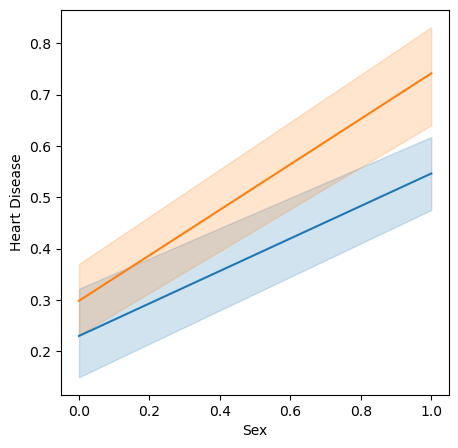

In [12]:
fig,ax=plt.subplots(figsize=(5,5))  
ax=sns.lineplot(x=dataset['Sex'],y=dataset['Heart Disease'])
ax1=sns.lineplot(x=dataset['Exercise angina'],y=dataset['Heart Disease'])

<AxesSubplot:>

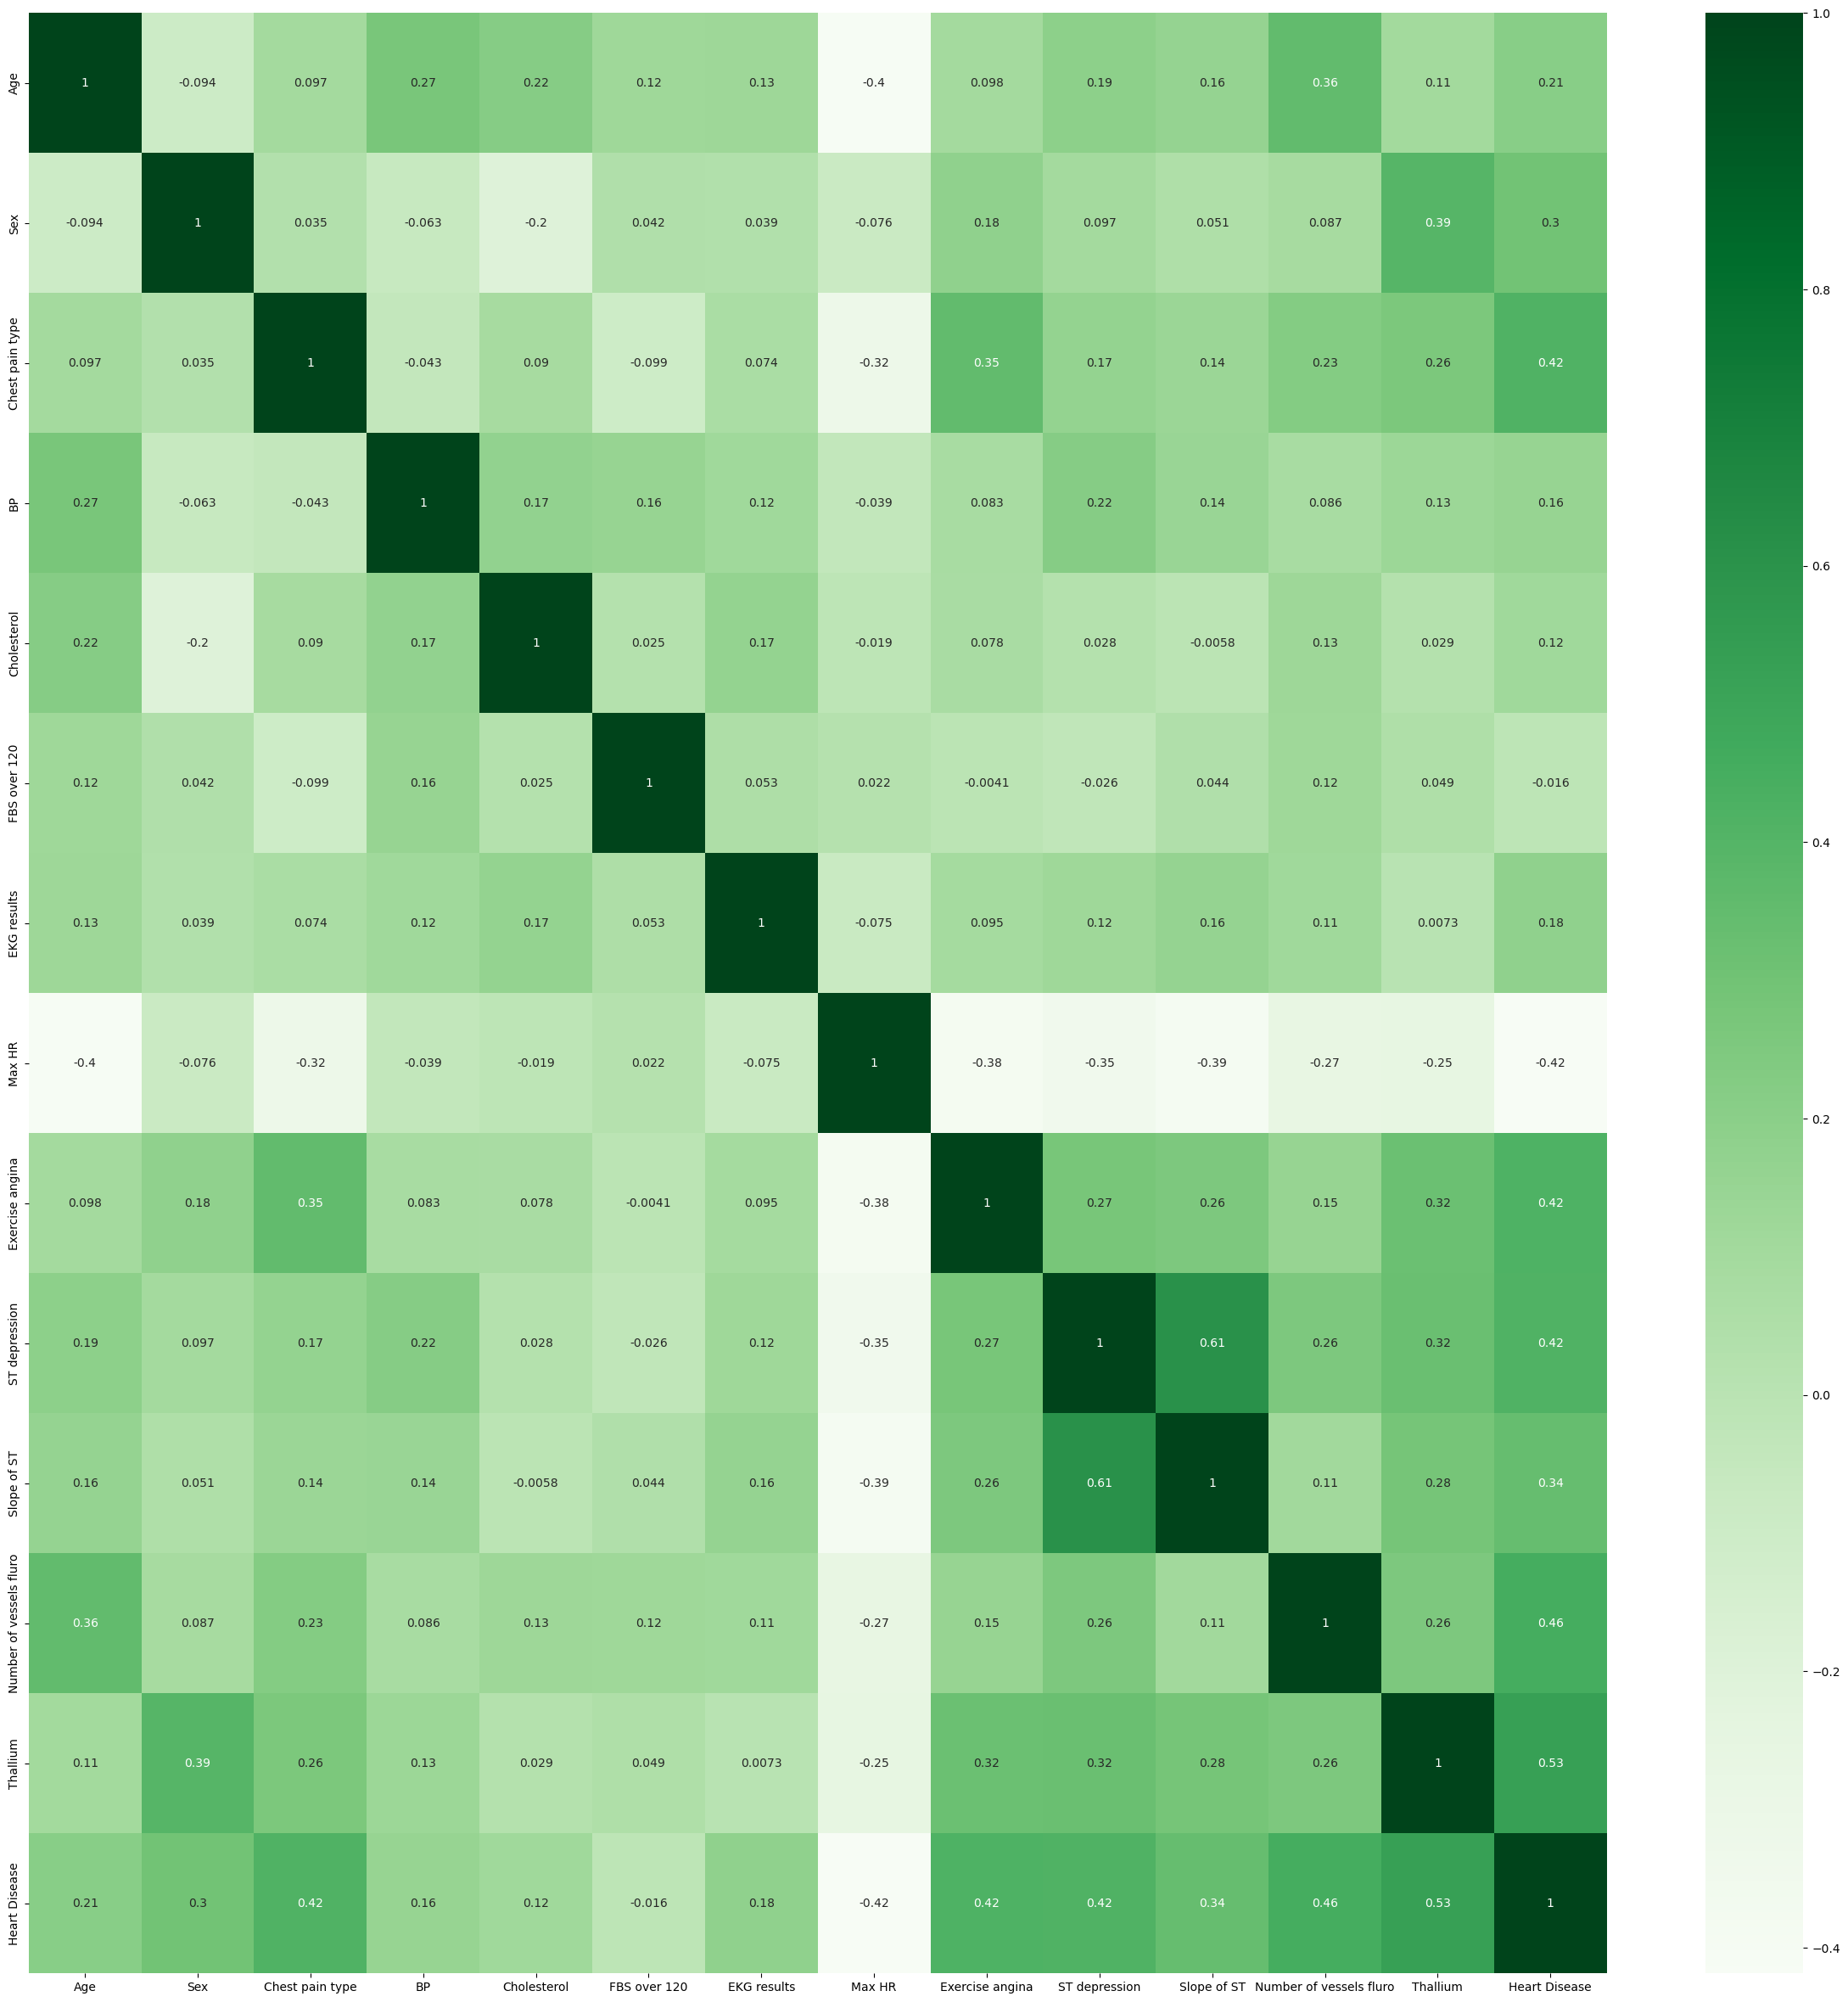

In [13]:
plt.figure(figsize=(30,30))
sns.heatmap(dataset.corr(),annot=True,cmap='Greens')

<AxesSubplot:xlabel='Thallium', ylabel='Heart Disease'>

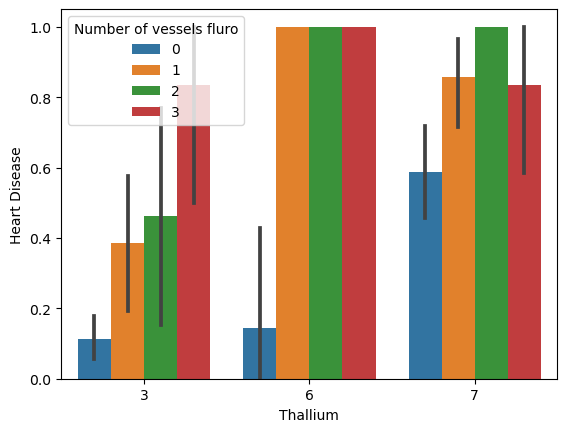

In [14]:
sns.barplot(x=dataset['Thallium'],y=dataset["Heart Disease"],hue=dataset['Number of vessels fluro'])

<AxesSubplot:xlabel='ST depression', ylabel='Heart Disease'>

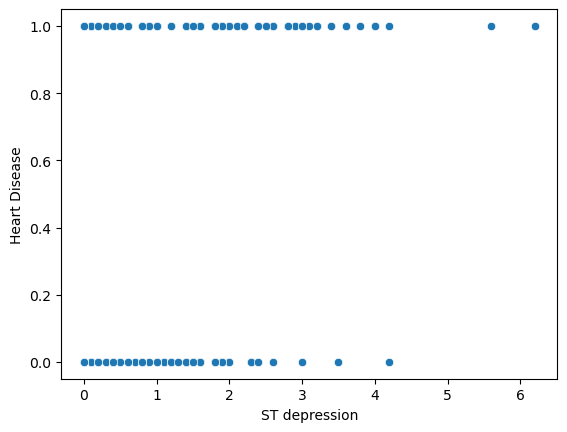

In [15]:
sns.scatterplot(x=dataset['ST depression'],y=dataset['Heart Disease'])

### DATASET SPLITING

In [16]:
x=dataset.drop(columns=["Heart Disease","Max HR","FBS over 120"],axis=1)
y=dataset['Heart Disease']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2)

In [19]:
x_train

,Age,Sex,Chest pain type,BP,Cholesterol,EKG results,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
84,57,1,4,110,201,0,1,1.5,2,0,6
18,64,1,1,110,211,2,1,1.8,2,0,3
217,51,1,3,94,227,0,1,0.0,1,1,7
206,60,0,3,102,318,0,0,0.0,1,1,3
25,48,0,3,130,275,0,0,0.2,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...
75,45,1,4,142,309,2,1,0.0,2,3,7
22,43,1,4,115,303,0,0,1.2,2,0,3
72,70,1,2,156,245,2,0,0.0,1,0,3
15,71,0,4,112,149,0,0,1.6,2,0,3


In [20]:
y_train

84     0
18     0
217    0
206    0
25     0
      ..
75     1
22     0
72     0
15     0
168    0
Name: Heart Disease, Length: 202, dtype: int32

In [21]:
x_test

,Age,Sex,Chest pain type,BP,Cholesterol,EKG results,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
131,66,1,4,112,212,2,1,0.1,1,1,3
183,42,0,4,102,265,2,0,0.6,2,0,3
200,68,1,3,118,277,0,0,1.0,1,1,7
65,57,1,4,150,276,2,1,0.6,2,1,6
91,61,0,4,130,330,2,0,0.0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...
20,67,1,4,120,229,2,1,2.6,2,2,7
28,58,1,3,112,230,2,0,2.5,2,1,7
244,51,0,3,140,308,2,0,1.5,1,1,3
64,63,1,1,145,233,2,0,2.3,3,0,6


In [22]:
y_test

131    1
183    0
200    0
65     1
91     1
      ..
20     1
28     1
244    0
64     0
14     0
Name: Heart Disease, Length: 68, dtype: int32

### LOGISTIC REGRESSION

In [23]:
from sklearn.linear_model import LogisticRegression

In [43]:
lr=LogisticRegression()

### TRAINING

In [44]:
model1=lr.fit(x_train,y_train)

### PREDICTING

In [45]:
y1_pred=lr.predict(x_test)

In [46]:
y1_pred

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0])

### ACCURACY SCORE

In [47]:
print("accuracy score of LOgisticRegresssion :",accuracy_score(y1_pred,y_test))

accuracy score of LOgisticRegresssion : 0.8235294117647058


### XGBCLASSIFIER

In [29]:
from xgboost import XGBClassifier

In [30]:
xg=XGBClassifier()

### TRAINING

In [31]:
model3=xg.fit(x_train,y_train)

### PREDICTING

In [32]:
y3_pred=xg.predict(x_test)

### ACCURACY SCORE

In [33]:
print("accuracy score of XGBoost:",accuracy_score(y_test,y3_pred))

accuracy score of XGBoost: 0.7794117647058824


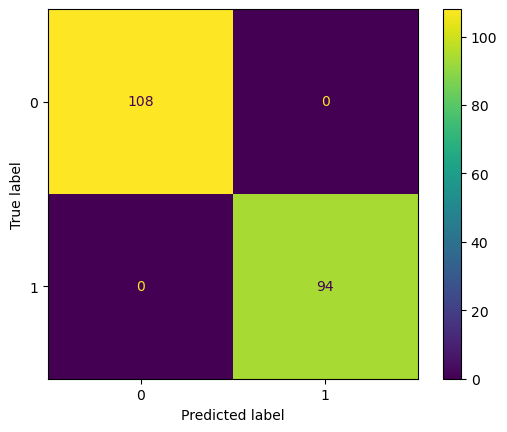

In [34]:
plot_confusion_matrix(model3,x_train,y_train)

### RANDOMFORESTCLASSIFIER

In [35]:
from sklearn.ensemble import RandomForestClassifier

### TRAINING MODEL

In [59]:
rf=RandomForestClassifier(max_depth=10,n_estimators=10)

In [60]:
model4=rf.fit(x_train,y_train)

### PREDICTING VALUES

In [61]:
y4_pred=rf.predict(x_test)

In [57]:
y4_pred

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1])

In [62]:
print("accuracy score of RandomForest:",accuracy_score(y_test,y4_pred))

accuracy score of RandomForest: 0.8235294117647058


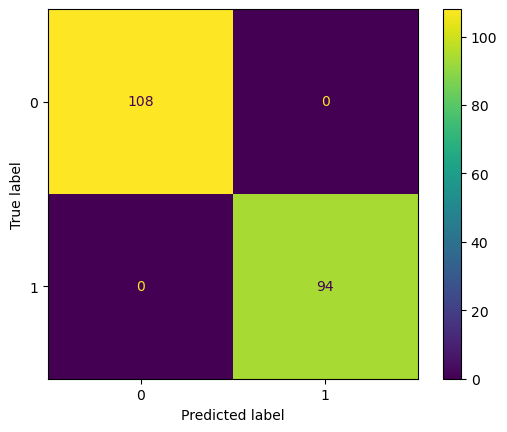

In [41]:
plot_confusion_matrix(model4,x_train,y_train)